In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from imblearn.over_sampling import SMOTE

In [50]:
df = pd.read_csv('Corrected_Combined_Data.csv', encoding='latin-1')

In [51]:
df

,Source.Name,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,Year Score,Property Rights,Freedom from Corruption,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,index2013_data.xls,1,Afghanistan,Afghanistan,Asia-Pacific,NaN,NaN,NaN,NaN,15.0,...,Afghanistan,31.1,$29.7,5.7,10.3,$956,NaN,11.2,$83.4,12.1
1,index2013_data.xls,2,Albania,Albania,Europe,58.0,27.0,65.2,30.0,31.0,...,Albania,3.2,$24.9,2.0,4.4,"$7,741",13.5,3.4,"$1,031.4",58.9
2,index2013_data.xls,3,Algeria,Algeria,Middle East / North Africa,145.0,14.0,49.6,30.0,29.0,...,Algeria,36.0,$263.7,2.5,2.7,"$7,333",10.0,4.5,"$2,571.0",9.9
3,index2013_data.xls,4,Angola,Angola,Sub-Saharan Africa,158.0,40.0,47.3,15.0,20.0,...,Angola,19.6,$115.7,3.4,8.8,"$5,895",NaN,13.5,"$-5,585.5",30.9
4,index2013_data.xls,5,Argentina,Argentina,South and Central America / Caribbean,160.0,27.0,46.7,15.0,30.0,...,Argentina,40.9,$716.4,8.9,6.8,"$17,516",7.2,9.8,"$7,243.1",44.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,index2022_data.xls,179,Venezuela,Venezuela,Americas,176.0,32.0,24.8,0.2,NaN,...,Venezuela,28.4,$144.7,-30.0,-23.5,"$5,178",9.1,2355.1,959.0,304.1
1840,index2022_data.xls,180,Vietnam,Vietnam,Asia-Pacific,84.0,18.0,60.6,49.6,NaN,...,Vietnam,97.3,"$1,058.7",2.9,6.1,"$10,869",2.3,3.2,"15,800.0",46.6
1841,index2022_data.xls,181,Yemen,Yemen,Middle East and North Africa,NaN,NaN,NaN,NaN,NaN,...,Yemen,29.8,$62.6,-5.0,-3.3,"$1,927",13.4,26.2,-371.0,83.2
1842,index2022_data.xls,182,Zambia,Zambia,Sub-Saharan Africa,154.0,36.0,48.7,38.3,NaN,...,Zambia,18.4,$63.1,-3.5,1.9,"$3,342",12.2,16.4,234.0,117.8


In [52]:
df=df.drop('Source.Name', axis=1)

In [53]:
df.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,Year Score,Property Rights,Freedom from Corruption,Fiscal Freedom,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,NaN,NaN,NaN,NaN,15.0,NaN,...,Afghanistan,31.1,$29.7,5.7,10.3,$956,NaN,11.2,$83.4,12.1
1,2,Albania,Albania,Europe,58.0,27.0,65.2,30.0,31.0,92.6,...,Albania,3.2,$24.9,2.0,4.4,"$7,741",13.5,3.4,"$1,031.4",58.9
2,3,Algeria,Algeria,Middle East / North Africa,145.0,14.0,49.6,30.0,29.0,80.4,...,Algeria,36.0,$263.7,2.5,2.7,"$7,333",10.0,4.5,"$2,571.0",9.9
3,4,Angola,Angola,Sub-Saharan Africa,158.0,40.0,47.3,15.0,20.0,82.6,...,Angola,19.6,$115.7,3.4,8.8,"$5,895",NaN,13.5,"$-5,585.5",30.9
4,5,Argentina,Argentina,South and Central America / Caribbean,160.0,27.0,46.7,15.0,30.0,64.3,...,Argentina,40.9,$716.4,8.9,6.8,"$17,516",7.2,9.8,"$7,243.1",44.2


In [54]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CountryID                    1844 non-null   int64  
 1   Country Name                 1844 non-null   object 
 2   WEBNAME                      1844 non-null   object 
 3   Region                       1844 non-null   object 
 4   World Rank                   1782 non-null   float64
 5   Region Rank                  1782 non-null   float64
 6   Year Score                   1782 non-null   float64
 7   Property Rights              1816 non-null   float64
 8   Freedom from Corruption      730 non-null    float64
 9   Fiscal Freedom               720 non-null    float64
 10  Gov't Spending               1813 non-null   float64
 11  Business Freedom             1828 non-null   float64
 12  Labor Freedom                1824 non-null   float64
 13  Monetary Freedom  

In [55]:
df.describe()

,CountryID,World Rank,Region Rank,Year Score,Property Rights,Freedom from Corruption,Fiscal Freedom,Gov't Spending,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Income Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),Inflation (%),Public Debt (% of GDP)
count,1844.000000,1782.000000,1782.000000,1782.000000,1816.000000,730.000000,720.000000,1813.000000,1828.000000,1824.000000,1819.000000,1804.000000,1815.000000,1795.000000,1824.000000,1797.000000,1808.000000,1844.000000,1822.000000,1797.000000
mean,93.300434,89.687991,20.103255,60.763749,49.286674,41.090548,77.596111,63.784777,63.806072,59.673465,74.945739,74.107871,56.068871,48.690808,28.219408,22.159265,33.582444,121.261329,528.585016,54.735156
std,53.695508,51.493661,12.616865,11.127318,22.746397,20.541240,13.050677,23.749408,16.088759,14.923554,10.877045,12.450160,22.827023,19.143060,13.336844,16.673779,13.958505,1756.584239,21787.287704,35.970606
min,1.000000,1.000000,1.000000,1.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,10.100000,0.036000,-16.400000,0.000000
25%,47.000000,45.000000,9.000000,53.900000,30.000000,26.000000,70.900000,51.000000,54.100000,50.200000,71.550000,66.800000,40.000000,30.000000,20.000000,13.700000,24.400000,2.400000,1.200000,32.600000
50%,93.000000,90.000000,19.000000,60.700000,46.750000,34.650000,79.300000,69.300000,64.300000,59.700000,76.900000,75.800000,60.000000,50.000000,30.000000,20.200000,32.000000,9.050000,2.900000,47.100000
75%,140.000000,134.000000,30.000000,68.300000,65.925000,53.375000,85.800000,82.100000,74.900000,69.925000,81.200000,84.000000,75.000000,60.000000,35.000000,28.700000,40.400000,29.325000,5.800000,69.900000
max,186.000000,180.000000,47.000000,90.200000,100.000000,95.000000,99.900000,97.000000,100.000000,98.500000,91.700000,95.000000,95.000000,90.000000,100.000000,342.000000,156.400000,38000.000000,929789.500000,304.100000


In [56]:
#checking missing values
df.isnull().sum()

CountryID                         0
Country Name                      0
WEBNAME                           0
Region                            0
World Rank                       62
Region Rank                      62
Year Score                       62
Property Rights                  28
Freedom from Corruption        1114
Fiscal Freedom                 1124
Gov't Spending                   31
Business Freedom                 16
Labor Freedom                    20
Monetary Freedom                 25
Trade Freedom                    40
Investment Freedom               29
Financial Freedom                49
Tariff Rate (%)                  46
Income Tax Rate (%)              20
Corporate Tax Rate (%)           20
Tax Burden % of GDP              47
Gov't Expenditure % of GDP       36
Country                           0
Population (Millions)             0
GDP (Billions, PPP)               8
GDP Growth Rate (%)               5
5 Year GDP Growth Rate (%)       28
GDP per Capita (PPP)        

In [57]:
df.columns

Index(['CountryID', 'Country Name', 'WEBNAME', 'Region', 'World Rank',
       'Region Rank', 'Year Score', 'Property Rights',
       'Freedom from Corruption', 'Fiscal Freedom ', 'Gov't Spending',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Gov't Expenditure % of GDP ', 'Country',
       'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)'],
      dtype='object')

In [58]:
#checing for countries having no rank
df_null=df[df['World Rank'].isna()]

In [59]:
#df_null=df_null.drop(index=df.index[-4:], 
        #axis=0, 
       # inplace=True)

In [60]:
df_null = df_null.iloc[:-4 , :]

In [61]:
df_null

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,Year Score,Property Rights,Freedom from Corruption,Fiscal Freedom,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,NaN,NaN,NaN,NaN,15.0,NaN,...,Afghanistan,31.100,$29.7,5.7,10.3,$956,NaN,11.2,$83.4,12.1
76,77,Iraq,Iraq,Middle East / North Africa,NaN,NaN,NaN,NaN,18.0,NaN,...,Iraq,32.800,$127.6,9.9,5.1,"$3,886",15.0,6.0,"$1,616.7",86.9
88,185,Kosovo,Kosovo,Europe,NaN,NaN,NaN,30.0,29.0,93.5,...,Kosovo,1.700,$12.0,5.2,NaN,"$7,052",45.1,7.3,$473.0,5.6
96,96,Libya,Libya,Middle East / North Africa,NaN,NaN,NaN,10.0,20.0,NaN,...,Libya,6.500,$37.5,-61.0,-14.7,"$5,787",NaN,14.1,$0.0,NaN
97,97,Liechtenstein,Liechtenstein,Europe,NaN,NaN,NaN,NaN,NaN,NaN,...,Liechtenstein,0.036,$4.5,-0.5,NaN,"$124,485",2.2,0.7,NaN,NaN
151,184,Somalia,Somalia,Sub-Saharan Africa,NaN,NaN,NaN,NaN,10.0,NaN,...,Somalia,9.100,$6.1,$2.6,NaN,$600,NaN,NaN,102,NaN
155,154,Sudan,Sudan,Sub-Saharan Africa,NaN,NaN,NaN,NaN,16.0,NaN,...,Sudan,32.700,$89.0,-3.9,3.5,"$2,726",NaN,18.1,"$1,936.0",73.1
160,159,Syria,Syria,Middle East / North Africa,NaN,NaN,NaN,20.0,26.0,86.2,...,Syria,20.500,$106.0,-3.4,NaN,"$4,630",NaN,4.8,"$1,059.5",NaN
185,1,Afghanistan,Afghanistan,Asia-Pacific,NaN,NaN,NaN,NaN,10.0,91.2,...,Afghanistan,32.000,$33.7,10.2,9.9,"$1,054",35,4.4,93.8,NaN
261,77,Iraq,Iraq,Middle East / North Africa,NaN,NaN,NaN,NaN,13.7,95.5,...,Iraq,33.700,$238.6,8.4,7.1,"$7,080",16.0,6.1,"2,549.0",34.2


In [62]:
#country list having no rank
df_null['Country Name']

0         Afghanistan
76               Iraq
88             Kosovo
96              Libya
97      Liechtenstein
151           Somalia
155             Sudan
160             Syria
185       Afghanistan
261              Iraq
273            Kosovo
281             Libya
282     Liechtenstein
339             Sudan
368       Afghanistan
444              Iraq
462             Libya
518             Sudan
547       Afghanistan
624              Iraq
644             Libya
645     Liechtenstein
699           Somalia
703             Sudan
708             Syria
730             Yemen
810              Iraq
830             Libya
831     Liechtenstein
885           Somalia
894             Syria
916             Yemen
996              Iraq
1016            Libya
1017    Liechtenstein
1071          Somalia
1080            Syria
1102            Yemen
1183             Iraq
1203            Libya
1257          Somalia
1265            Syria
1287            Yemen
1368             Iraq
1388            Libya
1389    Li

In [63]:
df = df.dropna(axis=0, subset=['World Rank'])

In [64]:
df['World Rank'].isnull().sum()

0

In [65]:
df_copy=df.copy()

In [66]:
df = df.iloc[:-4 , :]

In [67]:
df

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,Year Score,Property Rights,Freedom from Corruption,Fiscal Freedom,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
1,2,Albania,Albania,Europe,58.0,27.0,65.2,30.0,31.0,92.6,...,Albania,3.2,$24.9,2.0,4.4,"$7,741",13.5,3.4,"$1,031.4",58.9
2,3,Algeria,Algeria,Middle East / North Africa,145.0,14.0,49.6,30.0,29.0,80.4,...,Algeria,36.0,$263.7,2.5,2.7,"$7,333",10.0,4.5,"$2,571.0",9.9
3,4,Angola,Angola,Sub-Saharan Africa,158.0,40.0,47.3,15.0,20.0,82.6,...,Angola,19.6,$115.7,3.4,8.8,"$5,895",NaN,13.5,"$-5,585.5",30.9
4,5,Argentina,Argentina,South and Central America / Caribbean,160.0,27.0,46.7,15.0,30.0,64.3,...,Argentina,40.9,$716.4,8.9,6.8,"$17,516",7.2,9.8,"$7,243.1",44.2
5,6,Armenia,Armenia,Europe,38.0,17.0,69.4,30.0,26.0,88.0,...,Armenia,3.3,$17.9,4.4,2.2,"$5,384",5.9,7.7,$524.6,35.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,174,United Kingdom,UnitedKingdom,Europe,24.0,17.0,72.7,96.2,NaN,NaN,...,United Kingdom,67.2,"$2,959.9",-9.9,-0.8,"$44,117",4.3,0.9,"19,724.0",103.7
1835,175,United States,UnitedStates,Americas,25.0,3.0,72.1,95.7,NaN,NaN,...,United States,329.5,"$20,932.8",-3.5,1.1,"$63,416",8.3,1.2,"156,321.0",127.1
1836,176,Uruguay,Uruguay,Americas,34.0,5.0,70.0,84.0,NaN,NaN,...,Uruguay,3.5,$79.3,-5.7,-0.3,"$22,459",12.7,9.8,"2,630.0",66.3
1837,177,Uzbekistan,Uzbekistan,Asia-Pacific,117.0,25.0,55.7,31.6,NaN,NaN,...,Uzbekistan,34.2,$252.6,1.6,4.7,"$7,449",6.0,12.9,"1,726.0",37.9


In [68]:
#removing null values
df = df.dropna(axis=0)

<AxesSubplot:>

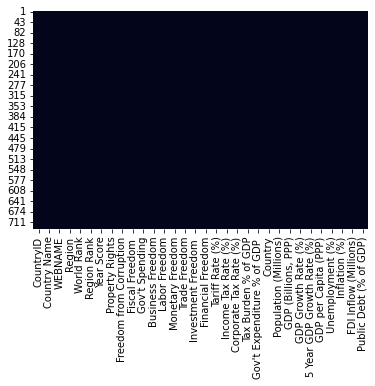

In [69]:
sns.heatmap(df.isnull(), cbar=False)

In [70]:
df.isnull().sum()

CountryID                      0
Country Name                   0
WEBNAME                        0
Region                         0
World Rank                     0
Region Rank                    0
Year Score                     0
Property Rights                0
Freedom from Corruption        0
Fiscal Freedom                 0
Gov't Spending                 0
Business Freedom               0
Labor Freedom                  0
Monetary Freedom               0
Trade Freedom                  0
Investment Freedom             0
Financial Freedom              0
Tariff Rate (%)                0
Income Tax Rate (%)            0
Corporate Tax Rate (%)         0
Tax Burden % of GDP            0
Gov't Expenditure % of GDP     0
Country                        0
Population (Millions)          0
GDP (Billions, PPP)            0
GDP Growth Rate (%)            0
5 Year GDP Growth Rate (%)     0
GDP per Capita (PPP)           0
Unemployment (%)               0
Inflation (%)                  0
FDI Inflow

In [71]:
columnsToChange = ['FDI Inflow (Millions)','GDP per Capita (PPP)', 'GDP (Billions, PPP)', 'Unemployment (%)','Tariff Rate (%)','Corporate Tax Rate (%)','5 Year GDP Growth Rate (%)','GDP Growth Rate (%)']
for column in columnsToChange:
  data = df[column]
  edited = []
  for row in data:
    noComma = row.replace(',', '')
    noDollar = noComma.replace('$', '')
    edited.append(noDollar)
  df[column] = [x for x in edited]
  df[column] = df[column].astype(float)
    
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 1 to 732
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CountryID                    599 non-null    int64  
 1   Country Name                 599 non-null    object 
 2   WEBNAME                      599 non-null    object 
 3   Region                       599 non-null    object 
 4   World Rank                   599 non-null    float64
 5   Region Rank                  599 non-null    float64
 6   Year Score                   599 non-null    float64
 7   Property Rights              599 non-null    float64
 8   Freedom from Corruption      599 non-null    float64
 9   Fiscal Freedom               599 non-null    float64
 10  Gov't Spending               599 non-null    float64
 11  Business Freedom             599 non-null    float64
 12  Labor Freedom                599 non-null    float64
 13  Monetary Freedom    

D:\Anaconda\envs\test_gpu\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\Anaconda\envs\test_gpu\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [72]:
list(df.select_dtypes(['object']).columns)

['Country Name', 'WEBNAME', 'Region', 'Country']

In [73]:
#renaming few columns
df.rename(columns={'Country Name': 'CountryName', 
                   'Judical Effectiveness': 'Judicial Effectiveness', 
                   'Gov\'t Spending': 'Gov Spending', 
                   'Gov\'t Expenditure % of GDP ': 'Gov Expenditure % of GDP',
                    'Investment Freedom ': 'Investment Freedom'}, inplace=True)

D:\Anaconda\envs\test_gpu\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


making a category column based on 2022 freedom index score (Thresholding)

In [74]:
bins = [0, 49.9, 59.9, 69.9, 79.9, 100]
names = ['Repressed', 'Mostly_unfree', 'moderately_free', 'mostly_free', 'free']

df['Score Category'] = pd.cut(df['Year Score'], bins, labels=names)

print(df.dtypes)

CountryID                        int64
CountryName                     object
WEBNAME                         object
Region                          object
World Rank                     float64
Region Rank                    float64
Year Score                     float64
Property Rights                float64
Freedom from Corruption        float64
Fiscal Freedom                 float64
Gov Spending                   float64
Business Freedom               float64
Labor Freedom                  float64
Monetary Freedom               float64
Trade Freedom                  float64
Investment Freedom             float64
Financial Freedom              float64
Tariff Rate (%)                float64
Income Tax Rate (%)            float64
Corporate Tax Rate (%)         float64
Tax Burden % of GDP            float64
Gov Expenditure % of GDP       float64
Country                         object
Population (Millions)          float64
GDP (Billions, PPP)            float64
GDP Growth Rate (%)      

D:\Anaconda\envs\test_gpu\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [75]:
df['Score Category'].value_counts()

Mostly_unfree      198
moderately_free    194
mostly_free        114
Repressed           72
free                21
Name: Score Category, dtype: int64

In [76]:
df['Score Category']

1      moderately_free
2            Repressed
4            Repressed
5      moderately_free
6                 free
            ...       
726          Repressed
728          Repressed
729      Mostly_unfree
731      Mostly_unfree
732          Repressed
Name: Score Category, Length: 599, dtype: category
Categories (5, object): ['Repressed' < 'Mostly_unfree' < 'moderately_free' < 'mostly_free' < 'free']

In [77]:
df['Score Category'].isnull().sum()

0

In [78]:
df['Year Score'].max()

90.1

In [79]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

CountryID : [  2   3   5   6   7   8   9  10  11  12  13  15  16  18  19  20  21  22
  23  25  27  29  30  33  34  35  39  41  43  44  45  47  48  49  50  51
  52  54  57  58  61  62  64  65  68  69  70  71  72  73  74  75  76  78
  79  80  81  82  83  84  85  88  90  91  92  98  99 101 104 105 107 108
 109 110 112 113 114 115 117 118 119 120 121 123 124 126 127 128 129 130
 131 132 133 134 135 136 142 143 144 145 147 148 149 151 152 153 155 156
 157 158 160 161 163 164 167 168 169 172 173 174 175 176 177 179 180 182
 183  14 186  24  28  31  36  38  46  56  59  63  89  94  95 106 116 125
 138 139 141 170 178 181   4  17  26  32  37  40  53  55  60  66  67  93
 103 122 137 146 150 162 165 171 102]
CountryName : ['Albania' 'Algeria' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados' 'Belgium'
 'Belize' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Burma' 'Cambodia' 'Canada' 'Cape Verde' 'Chile' 'China

Categories (5, object): ['Repressed' < 'Mostly_unfree' < 'moderately_free' < 'mostly_free' < 'free']


In [80]:
categorical_val

['Region', 'Financial Freedom', 'Score Category']

In [81]:
continous_val

['CountryID',
 'CountryName',
 'WEBNAME',
 'World Rank',
 'Region Rank',
 'Year Score',
 'Property Rights',
 'Freedom from Corruption',
 'Fiscal Freedom ',
 'Gov Spending',
 'Business Freedom',
 'Labor Freedom',
 'Monetary Freedom',
 'Trade Freedom',
 'Investment Freedom',
 'Tariff Rate (%)',
 'Income Tax Rate (%)',
 'Corporate Tax Rate (%)',
 'Tax Burden % of GDP',
 'Gov Expenditure % of GDP',
 'Country',
 'Population (Millions)',
 'GDP (Billions, PPP)',
 'GDP Growth Rate (%)',
 '5 Year GDP Growth Rate (%)',
 'GDP per Capita (PPP)',
 'Unemployment (%)',
 'Inflation (%)',
 'FDI Inflow (Millions)',
 'Public Debt (% of GDP)']

In [82]:
for i in ['CountryID','CountryName','WEBNAME']:
    categorical_val.append(i)

In [83]:
categorical_val

['Region',
 'Financial Freedom',
 'Score Category',
 'CountryID',
 'CountryName',
 'WEBNAME']

In [84]:
for i in ['CountryID','CountryName','WEBNAME']:
    continous_val.remove(i)

In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
le = LabelEncoder()
le.fit_transform

<bound method LabelEncoder.fit_transform of LabelEncoder()>

In [87]:
category_map = {'free':1,
               'mostly_free':2,
               'moderately_free':3,
               'Mostly_unfree':4,
               'Repressed':5
}

df['Score Category'] = df['Score Category'].map(category_map)

D:\Anaconda\envs\test_gpu\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [88]:
df['Score Category']

1      3
2      5
4      5
5      3
6      1
      ..
726    5
728    5
729    4
731    4
732    5
Name: Score Category, Length: 599, dtype: category
Categories (5, int64): [5 < 4 < 3 < 2 < 1]

In [89]:
df=df.drop(['CountryID','CountryName','WEBNAME'], axis=1)

In [90]:
df.columns

Index(['Region', 'World Rank', 'Region Rank', 'Year Score', 'Property Rights',
       'Freedom from Corruption', 'Fiscal Freedom ', 'Gov Spending',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Gov Expenditure % of GDP', 'Country',
       'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)', 'Score Category'],
      dtype='object')

In [91]:
df['Region'] = df['Region'].astype('category')

In [92]:
df=df.drop('Country', axis=1)

In [93]:
dummies = pd.get_dummies(df['Region'])
dummies

,Asia-Pacific,Europe,Middle East / North Africa,North America,South and Central America / Caribbean,Sub-Saharan Africa
1,0,1,0,0,0,0
2,0,0,1,0,0,0
4,0,0,0,0,1,0
5,0,1,0,0,0,0
6,1,0,0,0,0,0
...,...,...,...,...,...,...
726,1,0,0,0,0,0
728,0,0,0,0,1,0
729,1,0,0,0,0,0
731,0,0,0,0,0,1


In [94]:
merged = pd.concat([df,dummies],axis='columns')
merged

,Region,World Rank,Region Rank,Year Score,Property Rights,Freedom from Corruption,Fiscal Freedom,Gov Spending,Business Freedom,Labor Freedom,...,Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Score Category,Asia-Pacific,Europe,Middle East / North Africa,North America,South and Central America / Caribbean,Sub-Saharan Africa
1,Europe,58.0,27.0,65.2,30.0,31.0,92.6,75.1,81.0,49.0,...,3.4,1031.4,58.9,3,0,1,0,0,0,0
2,Middle East / North Africa,145.0,14.0,49.6,30.0,29.0,80.4,44.1,65.2,52.6,...,4.5,2571.0,9.9,5,0,0,1,0,0,0
4,South and Central America / Caribbean,160.0,27.0,46.7,15.0,30.0,64.3,52.1,60.1,47.4,...,9.8,7243.1,44.2,5,0,0,0,0,1,0
5,Europe,38.0,17.0,69.4,30.0,26.0,88.0,82.1,87.6,77.1,...,7.7,524.6,35.1,3,0,1,0,0,0,0
6,Asia-Pacific,3.0,3.0,82.6,90.0,88.0,66.4,62.8,95.5,83.5,...,3.4,41316.7,22.9,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,Asia-Pacific,166.0,39.0,46.0,15.0,18.0,90.4,66.6,67.1,61.9,...,8.4,751.4,8.5,5,1,0,0,0,0,0
728,South and Central America / Caribbean,176.0,28.0,33.7,5.0,19.0,74.9,56.7,45.3,29.5,...,62.2,320.0,45.6,5,0,0,0,0,1,0
729,Asia-Pacific,131.0,27.0,54.0,15.0,31.0,79.3,75.1,58.3,62.6,...,4.1,9200.0,58.7,4,1,0,0,0,0,0
731,Sub-Saharan Africa,106.0,16.0,58.8,30.0,38.0,73.3,81.1,66.4,48.3,...,7.9,2483.8,31.1,4,0,0,0,0,0,1


In [95]:
final = merged.drop(["Region"],axis='columns')
final

,World Rank,Region Rank,Year Score,Property Rights,Freedom from Corruption,Fiscal Freedom,Gov Spending,Business Freedom,Labor Freedom,Monetary Freedom,...,Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Score Category,Asia-Pacific,Europe,Middle East / North Africa,North America,South and Central America / Caribbean,Sub-Saharan Africa
1,58.0,27.0,65.2,30.0,31.0,92.6,75.1,81.0,49.0,78.4,...,3.4,1031.4,58.9,3,0,1,0,0,0,0
2,145.0,14.0,49.6,30.0,29.0,80.4,44.1,65.2,52.6,76.6,...,4.5,2571.0,9.9,5,0,0,1,0,0,0
4,160.0,27.0,46.7,15.0,30.0,64.3,52.1,60.1,47.4,60.4,...,9.8,7243.1,44.2,5,0,0,0,0,1,0
5,38.0,17.0,69.4,30.0,26.0,88.0,82.1,87.6,77.1,73.0,...,7.7,524.6,35.1,3,0,1,0,0,0,0
6,3.0,3.0,82.6,90.0,88.0,66.4,62.8,95.5,83.5,83.8,...,3.4,41316.7,22.9,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,166.0,39.0,46.0,15.0,18.0,90.4,66.6,67.1,61.9,65.6,...,8.4,751.4,8.5,5,1,0,0,0,0,0
728,176.0,28.0,33.7,5.0,19.0,74.9,56.7,45.3,29.5,33.8,...,62.2,320.0,45.6,5,0,0,0,0,1,0
729,131.0,27.0,54.0,15.0,31.0,79.3,75.1,58.3,62.6,70.6,...,4.1,9200.0,58.7,4,1,0,0,0,0,0
731,106.0,16.0,58.8,30.0,38.0,73.3,81.1,66.4,48.3,72.6,...,7.9,2483.8,31.1,4,0,0,0,0,0,1


In [65]:
df=final
df.head(3)

,World Rank,Region Rank,Year Score,Property Rights,Freedom from Corruption,Fiscal Freedom,Gov Spending,Business Freedom,Labor Freedom,Monetary Freedom,...,Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Score Category,Asia-Pacific,Europe,Middle East / North Africa,North America,South and Central America / Caribbean,Sub-Saharan Africa
1,58.0,27.0,65.2,30.0,31.0,92.6,75.1,81.0,49.0,78.4,...,3.4,1031.4,58.9,3,0,1,0,0,0,0
2,145.0,14.0,49.6,30.0,29.0,80.4,44.1,65.2,52.6,76.6,...,4.5,2571.0,9.9,5,0,0,1,0,0,0
4,160.0,27.0,46.7,15.0,30.0,64.3,52.1,60.1,47.4,60.4,...,9.8,7243.1,44.2,5,0,0,0,0,1,0


In [ ]:
X=df.drop(['World Rank','Region Rank','Score Category'], axis=1)
y=df['Score Category']

In [68]:
y

1      3
2      5
4      5
5      3
6      1
      ..
726    5
728    5
729    4
731    4
732    5
Name: Score Category, Length: 599, dtype: category
Categories (5, int64): [5 < 4 < 3 < 2 < 1]

In [69]:
X.dtypes

Year Score                               float64
Property Rights                          float64
Freedom from Corruption                  float64
Fiscal Freedom                           float64
Gov Spending                             float64
Business Freedom                         float64
Labor Freedom                            float64
Monetary Freedom                         float64
Trade Freedom                            float64
Investment Freedom                       float64
Financial Freedom                        float64
Tariff Rate (%)                          float64
Income Tax Rate (%)                      float64
Corporate Tax Rate (%)                   float64
Tax Burden % of GDP                      float64
Gov Expenditure % of GDP                 float64
Population (Millions)                    float64
GDP (Billions, PPP)                      float64
GDP Growth Rate (%)                      float64
5 Year GDP Growth Rate (%)               float64
GDP per Capita (PPP)

In [70]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [71]:
y.dtypes

CategoricalDtype(categories=[5, 4, 3, 2, 1], ordered=True)

In [72]:
y.value_counts()

1    198
2    198
3    198
4    198
5    198
Name: Score Category, dtype: int64

<AxesSubplot:>

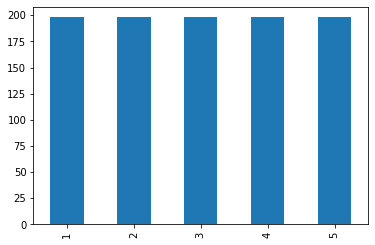

In [73]:
y.value_counts().plot(kind="bar")

In [74]:
X.shape

(990, 31)

In [75]:
y.shape

(990,)

In [76]:
#X=X.drop('Region', axis=1)

In [77]:
#from sklearn.feature_selection import chi2
#f_p_values=chi2(X,y)

In [78]:
X.columns[(X < 0).any()]

Index(['GDP Growth Rate (%)', '5 Year GDP Growth Rate (%)', 'Inflation (%)',
       'FDI Inflow (Millions)'],
      dtype='object')

In [79]:
X2=X.copy()

In [80]:
X2=X2.drop(['GDP Growth Rate (%)', '5 Year GDP Growth Rate (%)', 'Inflation (%)','FDI Inflow (Millions)'], axis=1)
X2.head()

,Year Score,Property Rights,Freedom from Corruption,Fiscal Freedom,Gov Spending,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,...,"GDP (Billions, PPP)",GDP per Capita (PPP),Unemployment (%),Public Debt (% of GDP),Asia-Pacific,Europe,Middle East / North Africa,North America,South and Central America / Caribbean,Sub-Saharan Africa
0,65.2,30.0,31.0,92.6,75.1,81.0,49.0,78.4,79.8,65.0,...,24.9,7741.0,13.5,58.9,0,1,0,0,0,0
1,49.6,30.0,29.0,80.4,44.1,65.2,52.6,76.6,67.8,20.0,...,263.7,7333.0,10.0,9.9,0,0,1,0,0,0
2,46.7,15.0,30.0,64.3,52.1,60.1,47.4,60.4,67.6,40.0,...,716.4,17516.0,7.2,44.2,0,0,0,0,1,0
3,69.4,30.0,26.0,88.0,82.1,87.6,77.1,73.0,85.4,75.0,...,17.9,5384.0,5.9,35.1,0,1,0,0,0,0
4,82.6,90.0,88.0,66.4,62.8,95.5,83.5,83.8,86.2,80.0,...,914.5,40234.0,5.1,22.9,1,0,0,0,0,0


In [81]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X2,y)

In [82]:
f_p_values

(array([2.87359149e+03, 1.54147802e+04, 1.11192710e+04, 7.16450258e+01,
        8.75860153e+02, 3.68163699e+03, 2.55554024e+03, 4.81295512e+02,
        1.00220080e+03, 8.74976289e+03, 7.80555416e+03, 2.30289904e+03,
        1.45262091e+02, 3.16297372e+02, 4.47808173e+02, 3.78987344e+02,
        2.12516895e+04, 3.46800127e+05, 1.17324915e+07, 1.29855773e+03,
        1.88217672e+03, 1.55192308e+02, 1.63121076e+02, 1.73559322e+01,
        3.36666667e+01, 5.89137931e+01, 1.24481481e+02]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.01998488e-014,
        2.82995540e-188, 0.00000000e+000, 0.00000000e+000, 7.43344620e-103,
        1.19028645e-215, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        2.10765136e-030, 3.30142478e-067, 1.29326693e-095, 9.63439651e-081,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 6.83707865e-280,
        0.00000000e+000, 1.56971158e-032, 3.12954262e-034, 1.64812939e-003,
        8.72185272e-007, 4.90589244e-012, 5.89096842e-

In [83]:
p_values=pd.Series(f_p_values[1])
p_values.index=X2.columns
p_values
#p value should be lower and f score should be higher 

Year Score                                0.000000e+00
Property Rights                           0.000000e+00
Freedom from Corruption                   0.000000e+00
Fiscal Freedom                            1.019985e-14
Gov Spending                             2.829955e-188
Business Freedom                          0.000000e+00
Labor Freedom                             0.000000e+00
Monetary Freedom                         7.433446e-103
Trade Freedom                            1.190286e-215
Investment Freedom                        0.000000e+00
Financial Freedom                         0.000000e+00
Tariff Rate (%)                           0.000000e+00
Income Tax Rate (%)                       2.107651e-30
Corporate Tax Rate (%)                    3.301425e-67
Tax Burden % of GDP                       1.293267e-95
Gov Expenditure % of GDP                  9.634397e-81
Population (Millions)                     0.000000e+00
GDP (Billions, PPP)                       0.000000e+00
GDP per Ca

In [84]:
p_values.sort_index(ascending=False)

Year Score                                0.000000e+00
Unemployment (%)                         6.837079e-280
Trade Freedom                            1.190286e-215
Tax Burden % of GDP                       1.293267e-95
Tariff Rate (%)                           0.000000e+00
Sub-Saharan Africa                        5.890968e-26
South and Central America / Caribbean     4.905892e-12
Public Debt (% of GDP)                    0.000000e+00
Property Rights                           0.000000e+00
Population (Millions)                     0.000000e+00
North America                             8.721853e-07
Monetary Freedom                         7.433446e-103
Middle East / North Africa                1.648129e-03
Labor Freedom                             0.000000e+00
Investment Freedom                        0.000000e+00
Income Tax Rate (%)                       2.107651e-30
Gov Spending                             2.829955e-188
Gov Expenditure % of GDP                  9.634397e-81
GDP per Ca

<AxesSubplot:xlabel='value', ylabel='variable'>

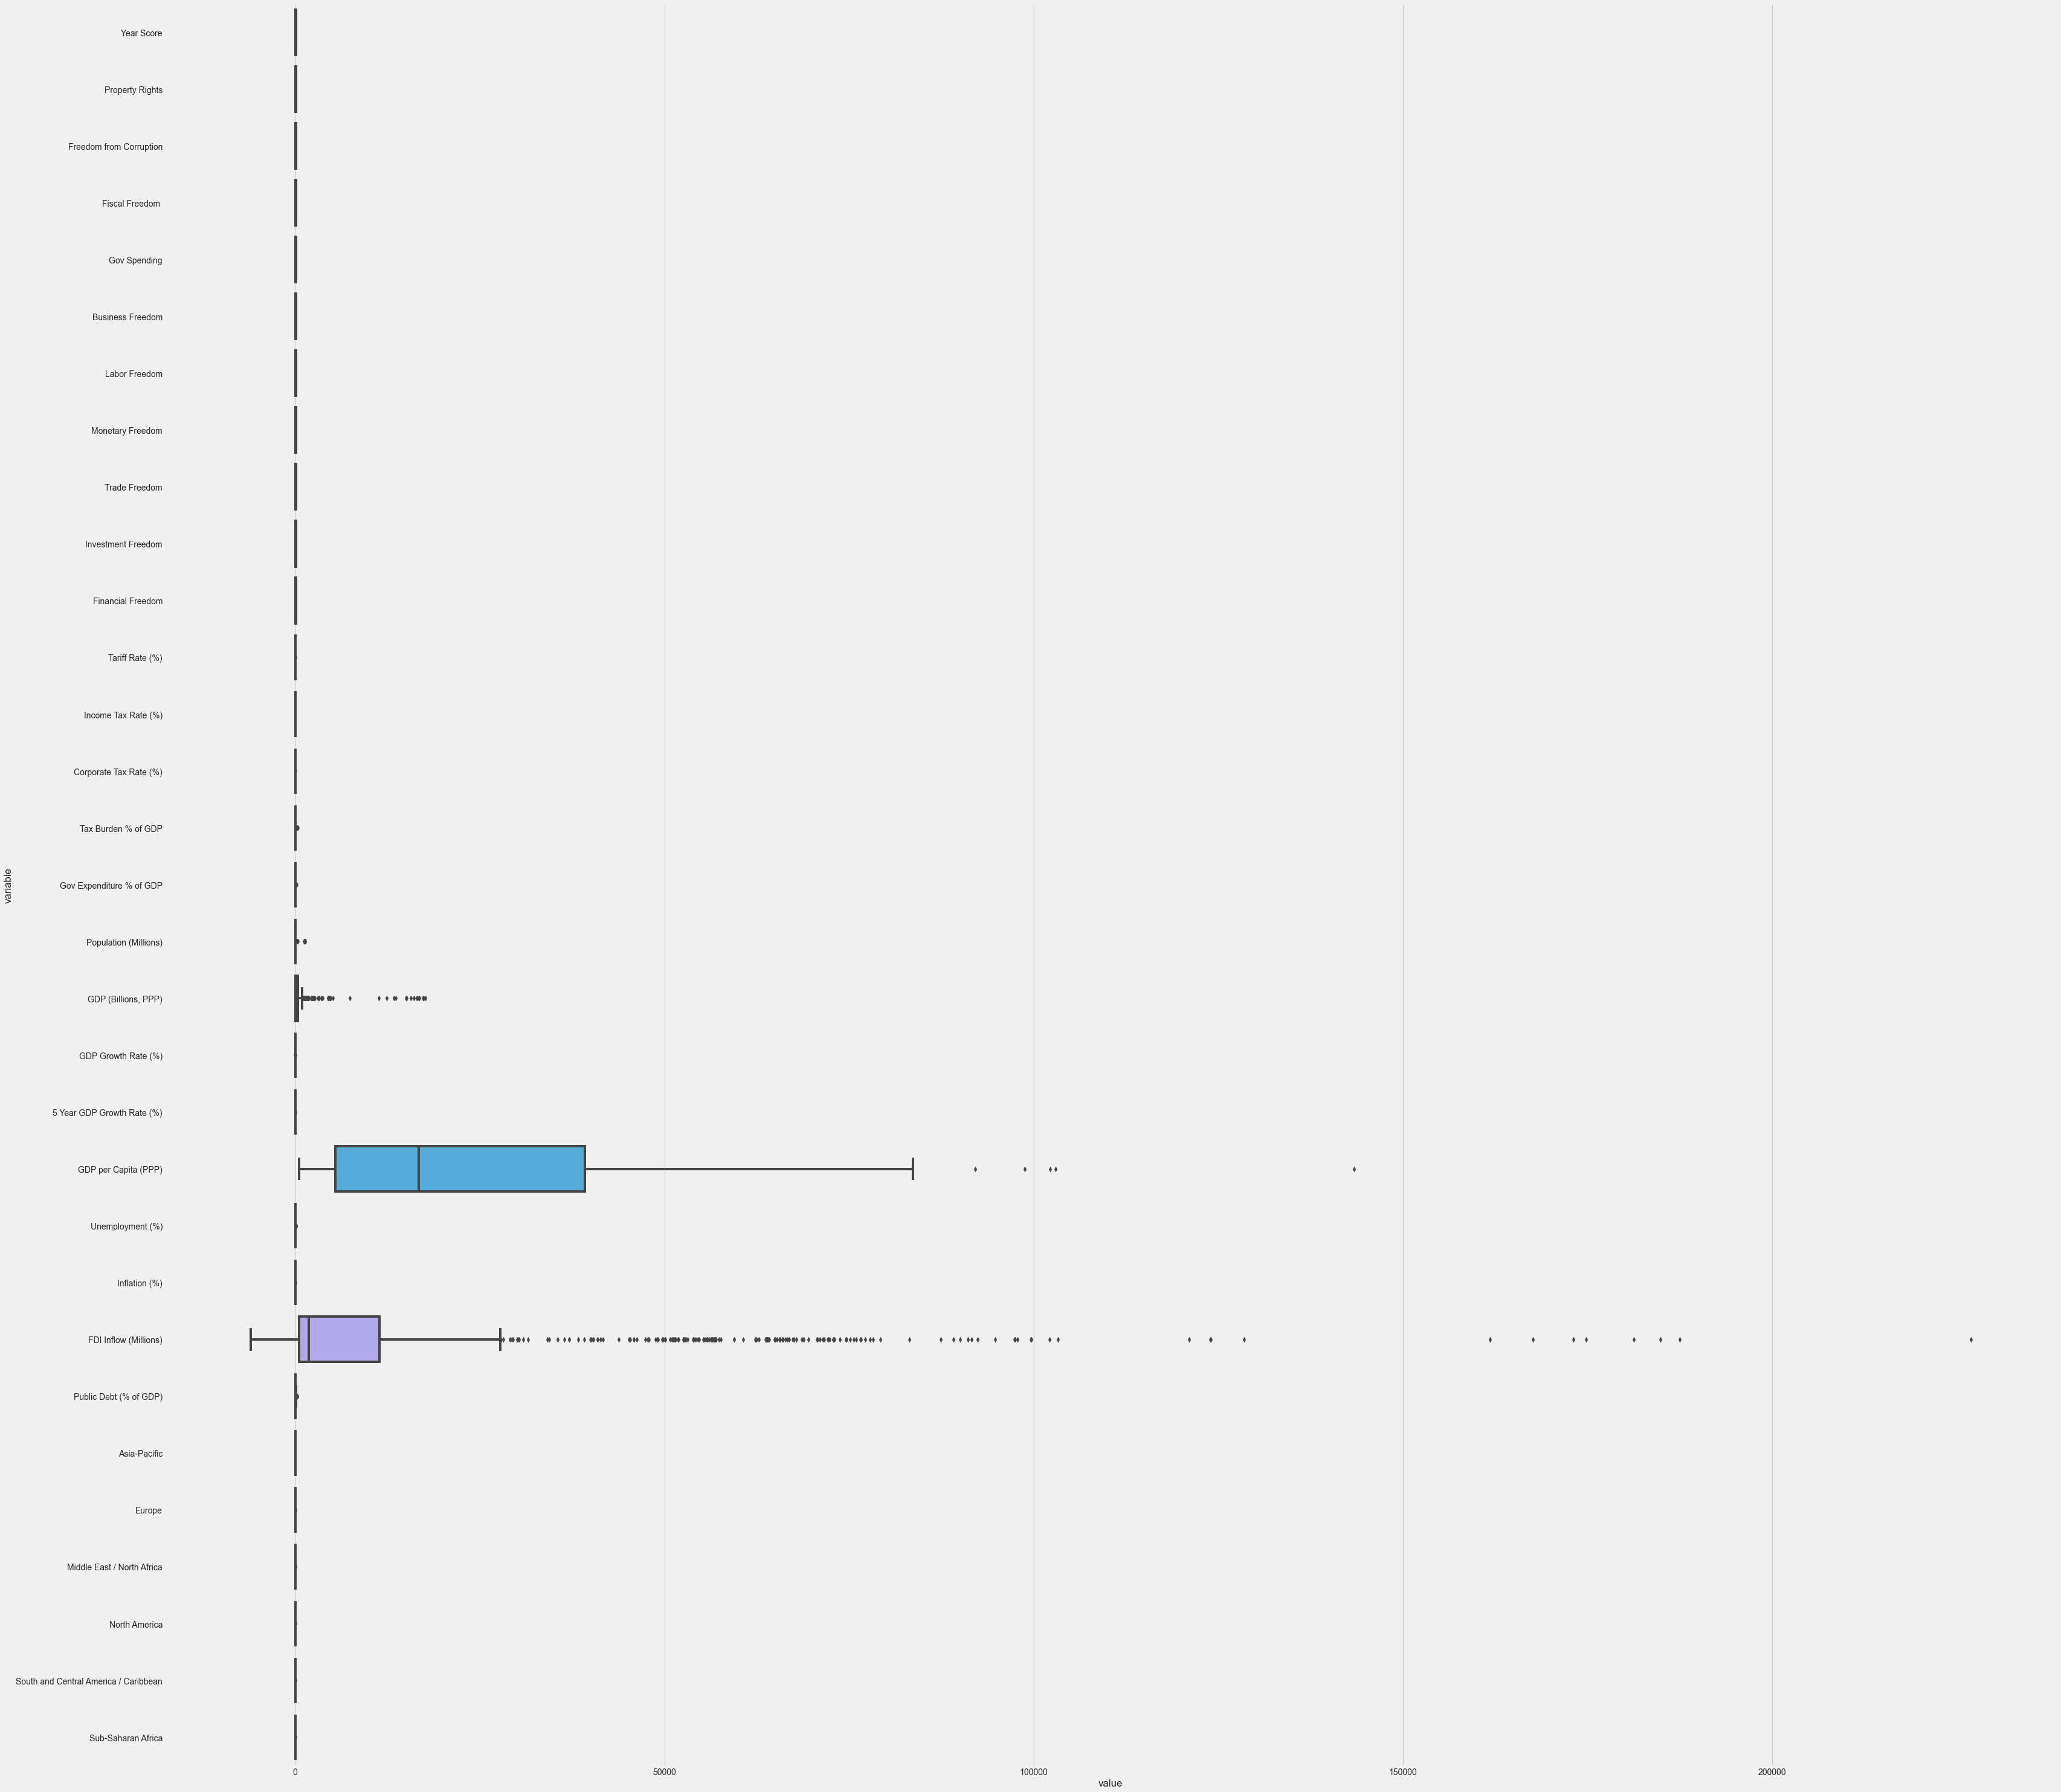

In [85]:
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")  #adding style to our plots
plt.figure(figsize=(50, 50))
sns.boxplot(x="value", y="variable", data=pd.melt(X))

<AxesSubplot:xlabel='variable', ylabel='value'>

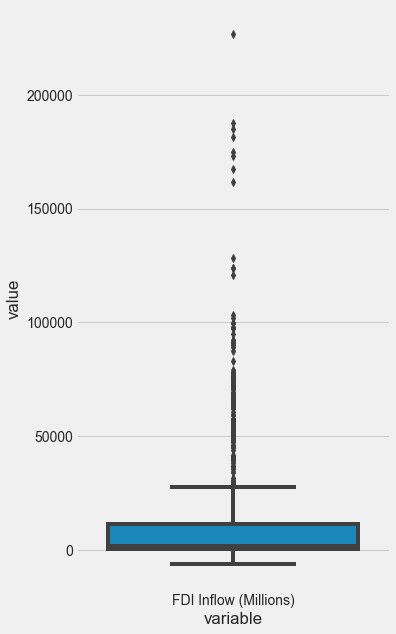

In [86]:
plt.figure(figsize=(5, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(X[['FDI Inflow (Millions)']]))

In [87]:
scaler = StandardScaler()
X[['FDI Inflow (Millions)']] = scaler.fit_transform(X[['FDI Inflow (Millions)']])

<AxesSubplot:xlabel='variable', ylabel='value'>

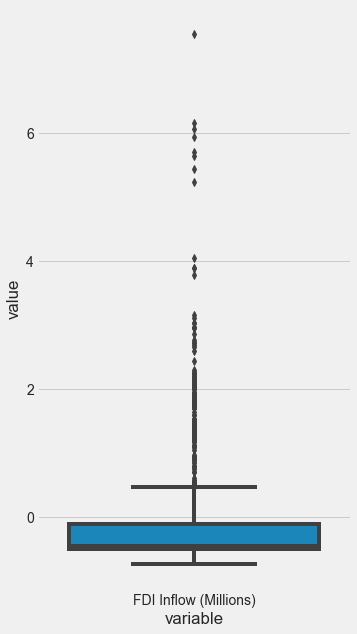

In [88]:
plt.figure(figsize=(5, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(X[['FDI Inflow (Millions)']]))

<AxesSubplot:xlabel='variable', ylabel='value'>

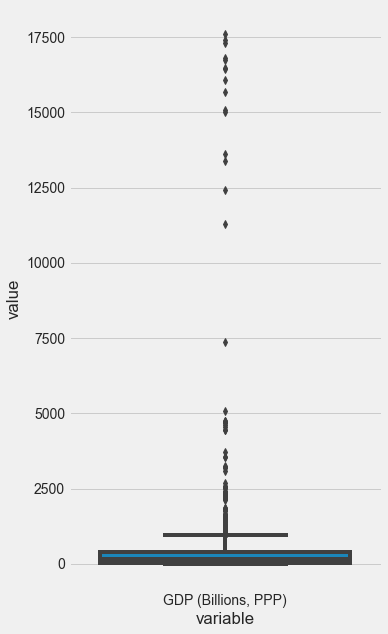

In [89]:
plt.figure(figsize=(5, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(X[['GDP (Billions, PPP)']]))

In [90]:
X['GDP (Billions, PPP)'] = np.log2(X['GDP (Billions, PPP)'])

<AxesSubplot:xlabel='variable', ylabel='value'>

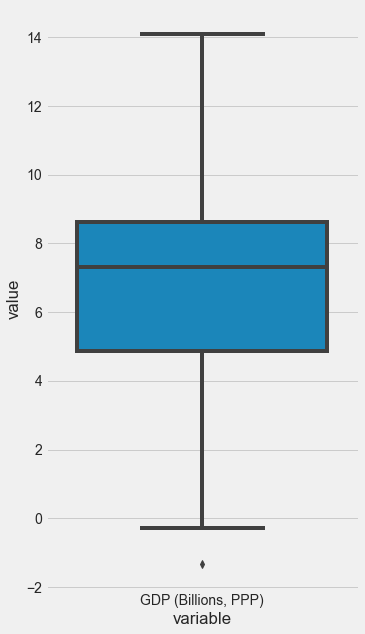

In [91]:
plt.figure(figsize=(5, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(X[['GDP (Billions, PPP)']]))

In [92]:
X.columns

Index(['Year Score', 'Property Rights', 'Freedom from Corruption',
       'Fiscal Freedom ', 'Gov Spending', 'Business Freedom', 'Labor Freedom',
       'Monetary Freedom', 'Trade Freedom', 'Investment Freedom',
       'Financial Freedom', 'Tariff Rate (%)', 'Income Tax Rate (%)',
       'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       'Gov Expenditure % of GDP', 'Population (Millions)',
       'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)', 'Asia-Pacific', 'Europe',
       'Middle East / North Africa', 'North America',
       'South and Central America / Caribbean', 'Sub-Saharan Africa'],
      dtype='object')

<AxesSubplot:>

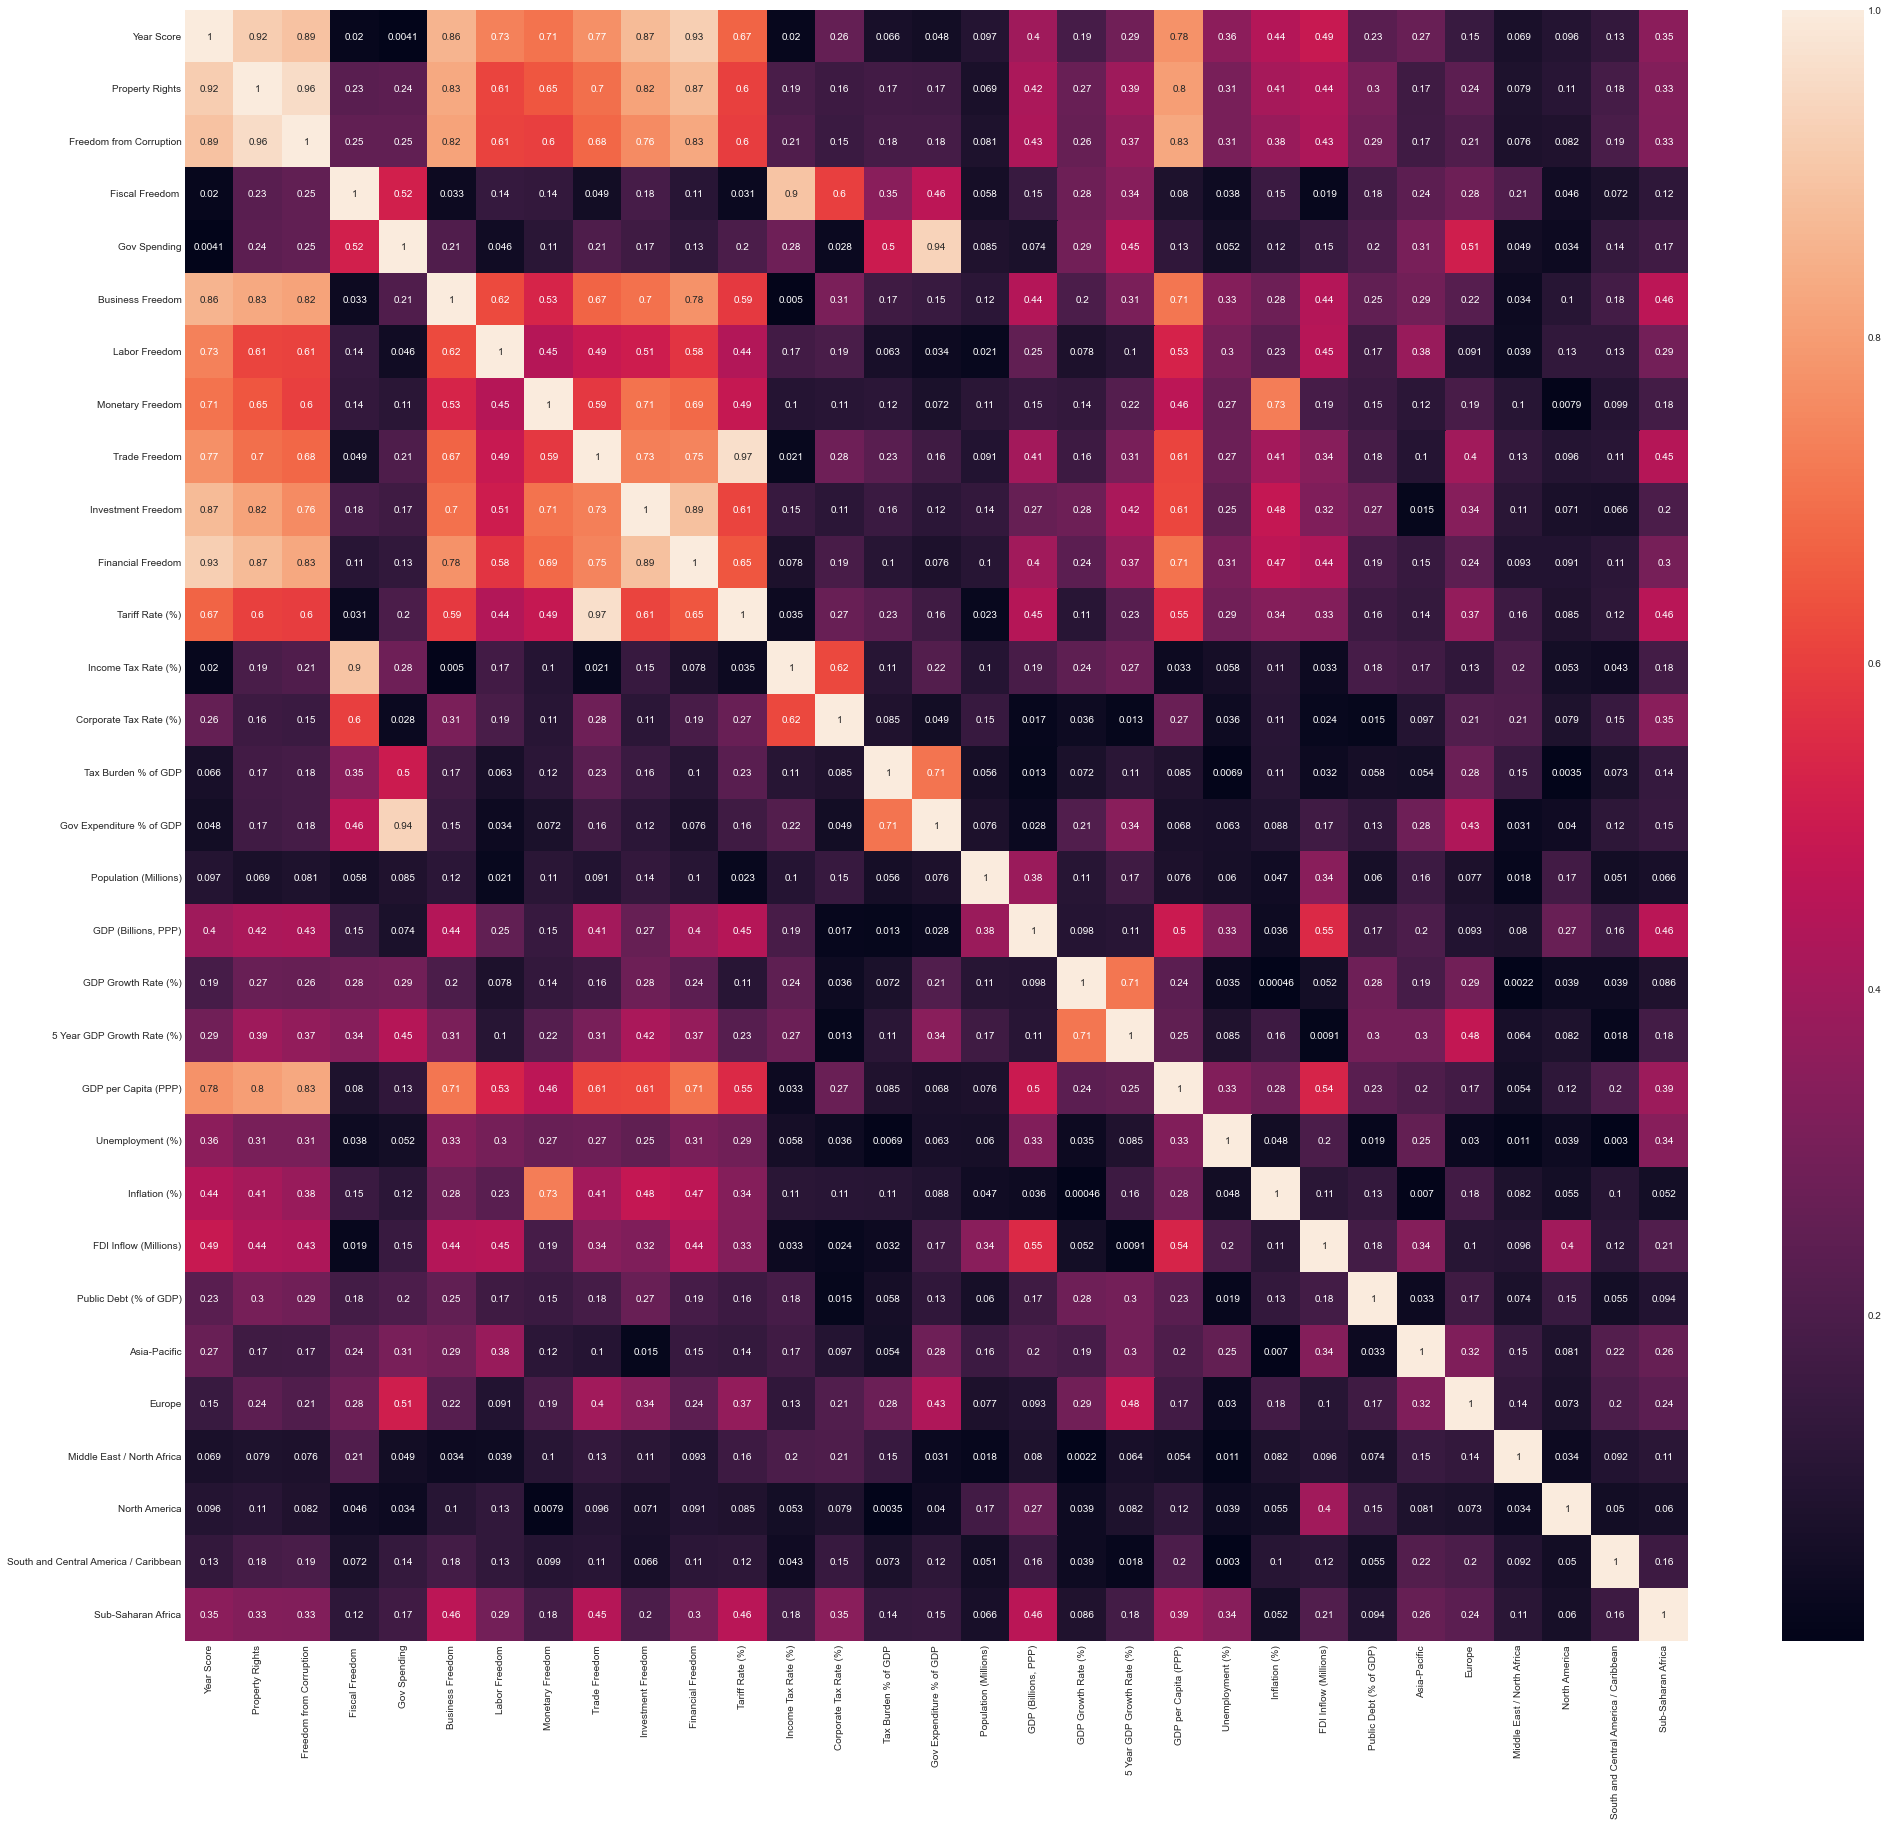

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30, 30))
sns.heatmap(X.corr().abs(),  annot=True)

In [94]:
X=X.drop(['Financial Freedom','Investment Freedom','Year Score','GDP per Capita (PPP)','GDP (Billions, PPP)','Tariff Rate (%)'], axis=1)

In [95]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [96]:
corr_features = correlation(X, 0.60)
len(set(corr_features))

10

In [97]:
corr_features

{'5 Year GDP Growth Rate (%)',
 'Business Freedom',
 'Corporate Tax Rate (%)',
 'Freedom from Corruption',
 'Gov Expenditure % of GDP',
 'Income Tax Rate (%)',
 'Inflation (%)',
 'Labor Freedom',
 'Monetary Freedom',
 'Trade Freedom'}

<AxesSubplot:xlabel='Inflation (%)', ylabel='Year Score'>

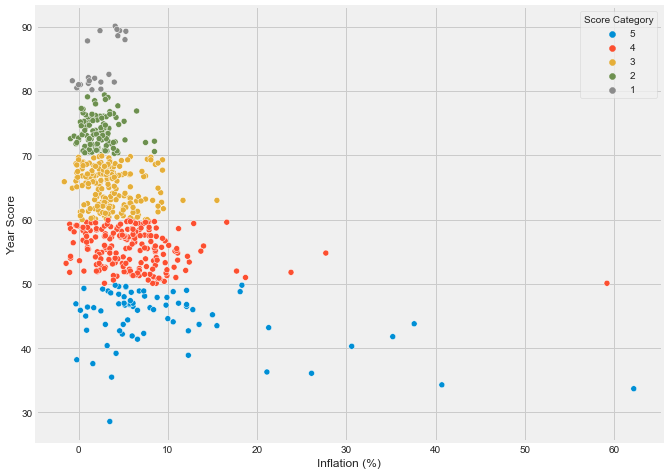

In [98]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="Inflation (%)", y="Year Score", hue='Score Category')

In [99]:
X=X.drop(corr_features,axis=1)   #removing the features

In [100]:
X.shape

(990, 15)

<AxesSubplot:>

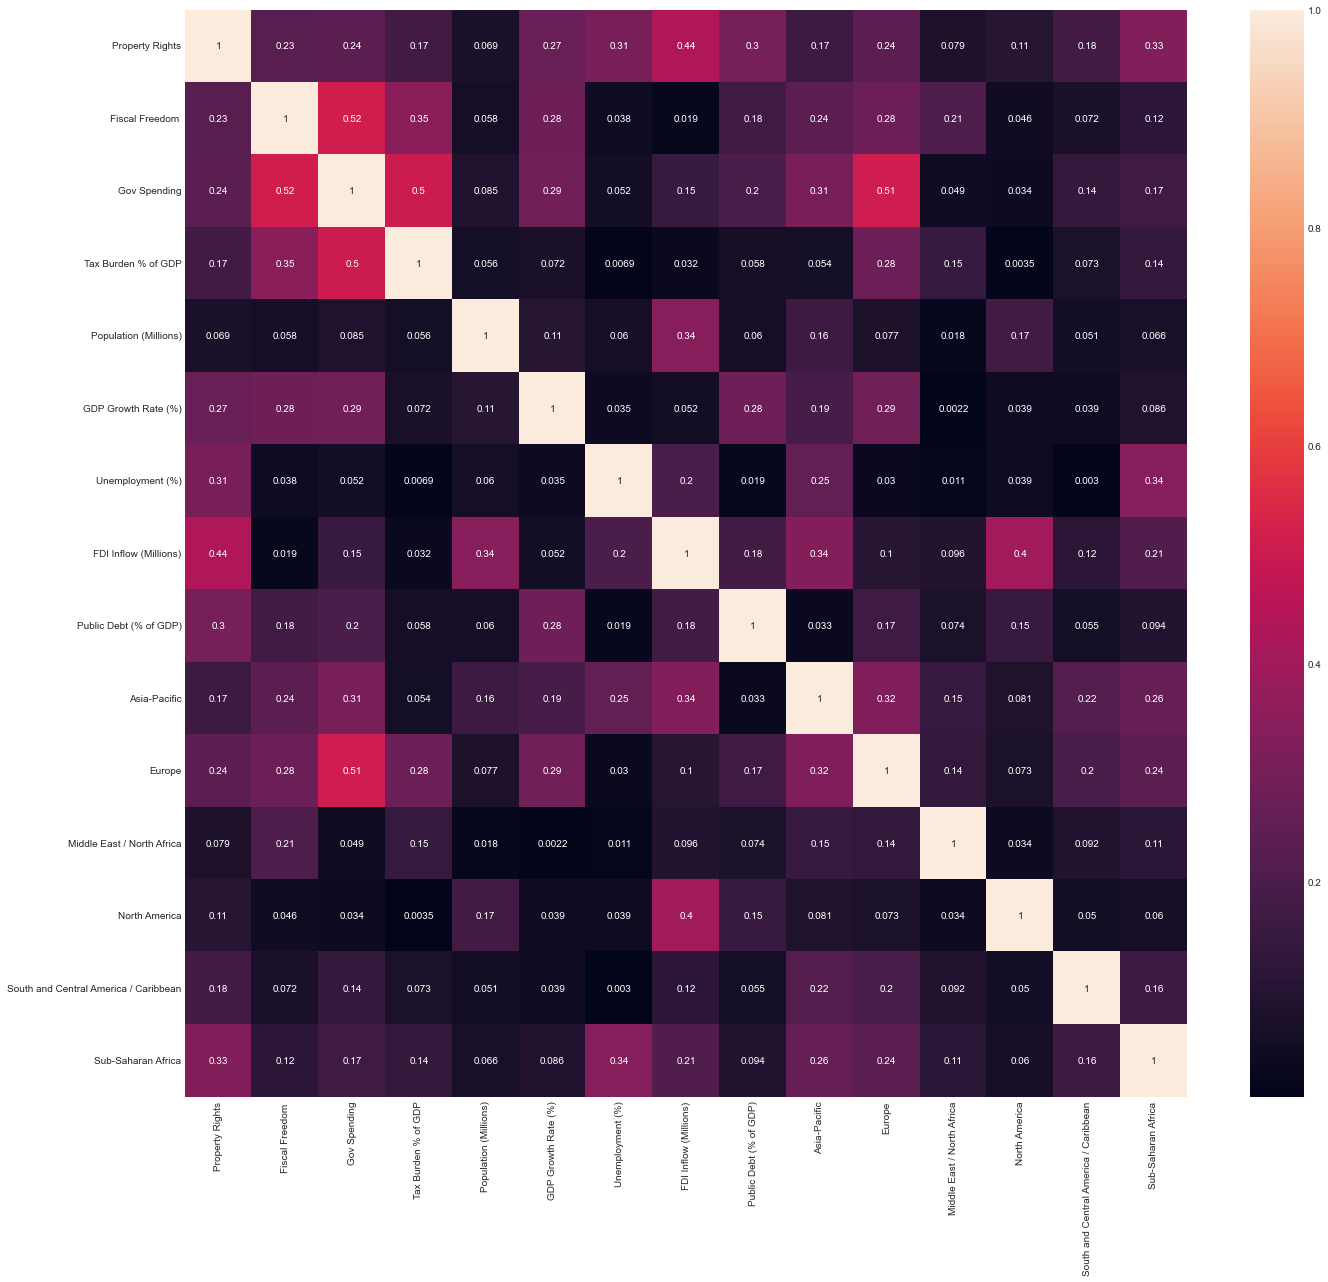

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 20))
sns.heatmap(X.corr().abs(),  annot=True)

<AxesSubplot:title={'center':'Correlation with target'}>

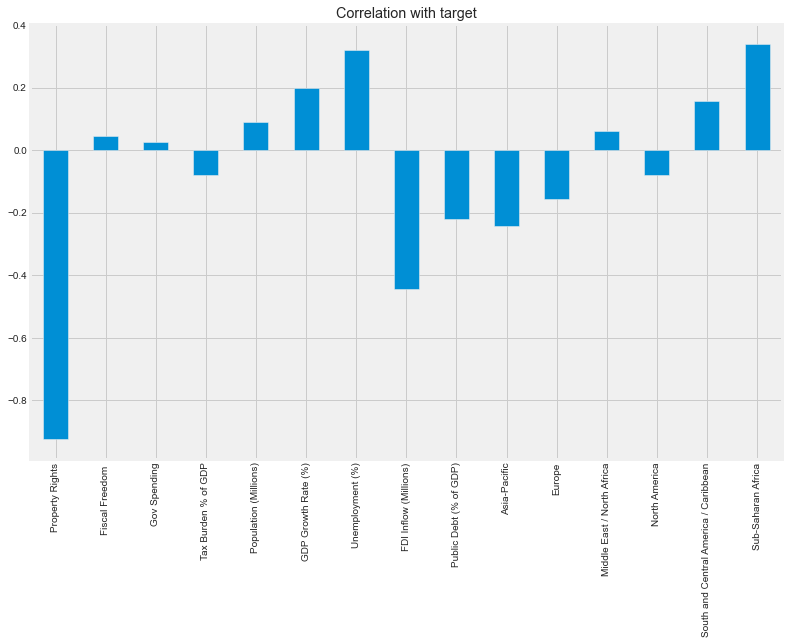

In [102]:
X.corrwith(y).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

In [103]:
X=X.fillna(X.mean())

In [104]:
X.isnull().sum()

Property Rights                          0
Fiscal Freedom                           0
Gov Spending                             0
Tax Burden % of GDP                      0
Population (Millions)                    0
GDP Growth Rate (%)                      0
Unemployment (%)                         0
FDI Inflow (Millions)                    0
Public Debt (% of GDP)                   0
Asia-Pacific                             0
Europe                                   0
Middle East / North Africa               0
North America                            0
South and Central America / Caribbean    0
Sub-Saharan Africa                       0
dtype: int64

In [105]:
X.head()

,Property Rights,Fiscal Freedom,Gov Spending,Tax Burden % of GDP,Population (Millions),GDP Growth Rate (%),Unemployment (%),FDI Inflow (Millions),Public Debt (% of GDP),Asia-Pacific,Europe,Middle East / North Africa,North America,South and Central America / Caribbean,Sub-Saharan Africa
0,30.0,92.6,75.1,23.3,3.2,2.0,13.5,-0.477006,58.9,0,1,0,0,0,0
1,30.0,80.4,44.1,10.4,36.0,2.5,10.0,-0.422241,9.9,0,0,1,0,0,0
2,15.0,64.3,52.1,33.5,40.9,8.9,7.2,-0.256050,44.2,0,0,0,0,1,0
3,30.0,88.0,82.1,20.0,3.3,4.4,5.9,-0.495034,35.1,0,1,0,0,0,0
4,90.0,66.4,62.8,20.9,22.7,2.0,5.1,0.955981,22.9,1,0,0,0,0,0
